# Hotel Booking Demand

In [ ]:
# EDA - Lets check trends, heatmap of the variables, explore the data, any cleaning or features we should make, trends we notice etc.
# Build LogReg for Cancellation to get Coefficients
# Further explore the coefficients driving cancellations
# Make a decision on how to make the final model, which should include ADR, and we want to propose how to increase ADR based on our findings - likely requires another EDA

In [ ]:
 pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.2 MB/s eta 0:00:00


import libraries

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sm
import dmba

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from dmba import classificationSummary

from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

%matplotlib inline

Colab environment detected.


Import Dataset into Collab

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/EthanRosehart/schulich_data_science/main/hotel_bookings.csv')

# Problem Statement:
There is an increase in hotel booking cancellations, and the city and resort hotels need to accurately forecast cancellations to optimize resource allocation and improve revenue management.

# Hypothesis:
Certain factors can have significant influence on hotel booking cancellations and the analysis of this dataset will validate the impact that these factors have on the likelihood of cancellations. Furthermore, predicting revenue which can be calculated from ADR, will give a monetary component for business impact.

# Exploratory Data Analysis

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There the reservation_status_date is in an incorrect data type. It will have to be converted.

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Check for nulls

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

*   For country nulls, nulls will be set to 'Unknown' (or we can drop them since its relatively a small number, but i'll set to unknown for now)
*   For agent nulls, nulls will be set to 0
*   For company nulls the nulls will be set to 0
*   For the rows with children nulls, they will be dropped as it makes up 0.003% of the total data.





In [ ]:
# fill missing values in 'country' column with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

In [ ]:
# fill missing values in 'agent' and 'company with 0
df['agent'] = df['agent'].fillna(0).astype(int)
df['company'] = df['company'].fillna(0).astype(int)

In [ ]:
# drop rows with missing values in 'children'
df = df.dropna(subset=['children'])

In [ ]:
# check changes were made
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# check for number of duplicates
df.duplicated().sum()

31994

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119386, dtype: bool

ASSUMPTION MADE: There is no unique identifier column (i.e customer_id or something to uniquely identify the entries) therefore we will keep the duplicates, as there is no way to know if they are actual duplicates or just two users with same characteristics.

In [ ]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44220
Name: count, dtype: int64

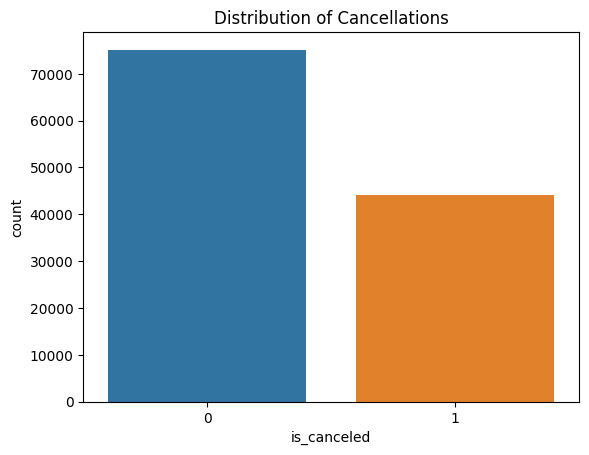

In [ ]:
# visualize distribution of 'is_canceled'
sns.countplot(x='is_canceled', data=df, hue='is_canceled', legend=False)
plt.title('Distribution of Cancellations')
plt.show()

The dataset is not balanced, as the non-cancellations represent about 63% of the data and cancellations represent 37%.

Cancellations by Year

In [ ]:
df['year'] = df['reservation_status_date'].dt.year

In [ ]:
cancellations_by_year = df[df['is_canceled'] == 1].groupby('year').size()

In [ ]:
cancellations_by_year

year
2014      181
2015    11463
2016    21428
2017    11148
dtype: int64

In [ ]:
avg_cancellations_by_year = cancellations_by_year.mean()
print(avg_cancellations_by_year)

11055.0


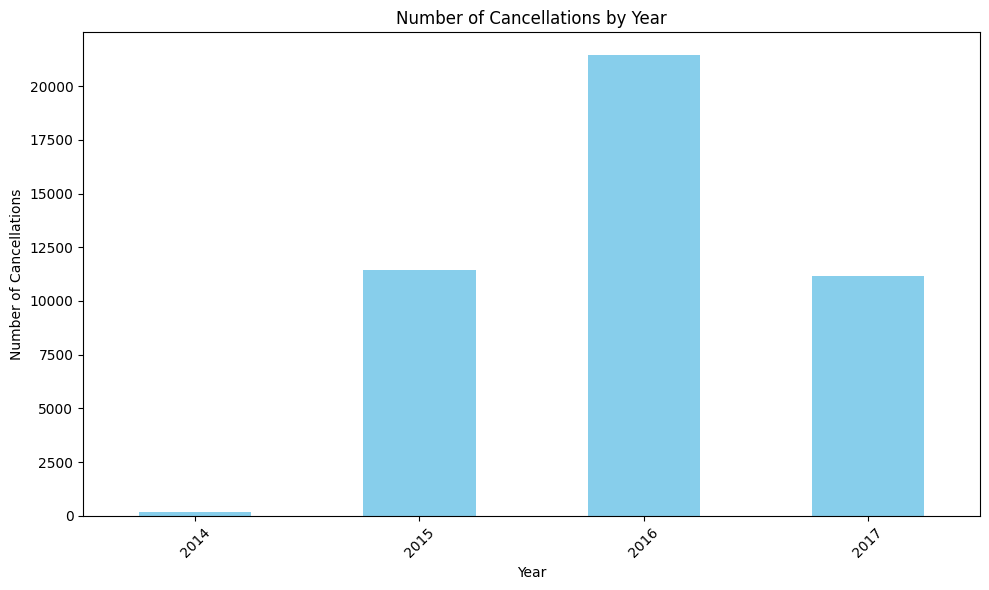

In [ ]:
# Cancellations by year Visualization
plt.figure(figsize=(10, 6))
cancellations_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Cancellations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Cancellations by Country**

In [ ]:
country_cancellations = df[df['is_canceled'] == 1]['country'].value_counts()
print(country_cancellations)

country
PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
       ...  
UMI        1
HND        1
FJI        1
SYC        1
CRI        1
Name: count, Length: 128, dtype: int64


In [ ]:
country_cancellations.head(10)

country
PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

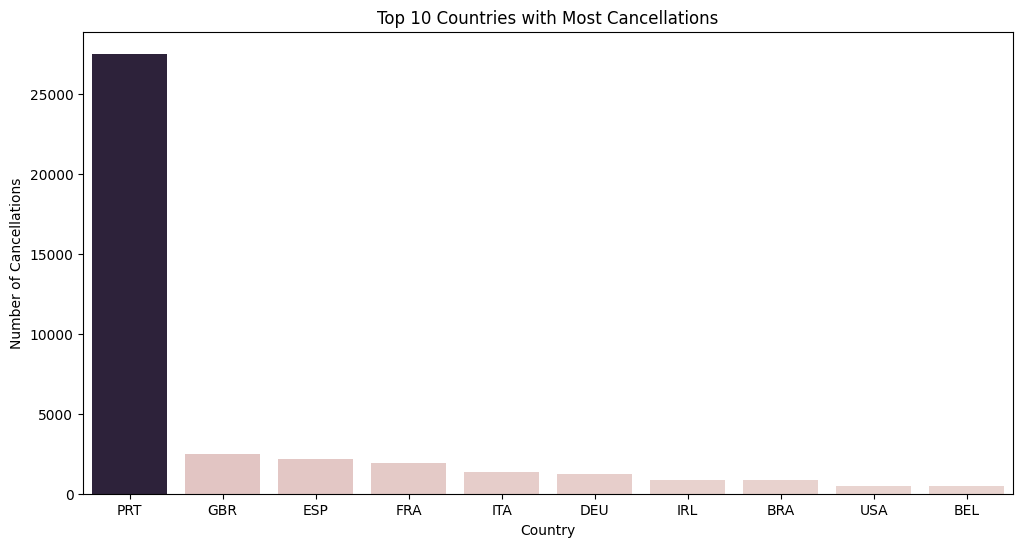

In [ ]:
# visualization of the top 10 countries that cancelled bookings are from
top_country_cancellations = country_cancellations.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_country_cancellations.index, y=top_country_cancellations.values, hue=top_country_cancellations, legend=False)
plt.title('Top 10 Countries with Most Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.show()

Based on this, it appears that Portugal, United Kingdon (GBR), Spain (ESP), France, Italy, Germany (DEU), Ireland, Brazil, United States and Belgium are among top countries that tend to cancel bookings more.


Using this learning, the hotel can consider implementing target campaigns for customers from these countries such as better customer engagement or incentives to reduce cancellation rates.

**Cancellations By Month**

In [ ]:
# correct the month order as it it currently in alphabetical order and not month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
# cancellations by month
monthly_cancellations = df[df['is_canceled'] == 1]['arrival_date_month'].value_counts().reindex(month_order)
print(monthly_cancellations)

arrival_date_month
January      1807
February     2696
March        3149
April        4524
May          4677
June         4535
July         4742
August       5235
September    4116
October      4246
November     2122
December     2371
Name: count, dtype: int64


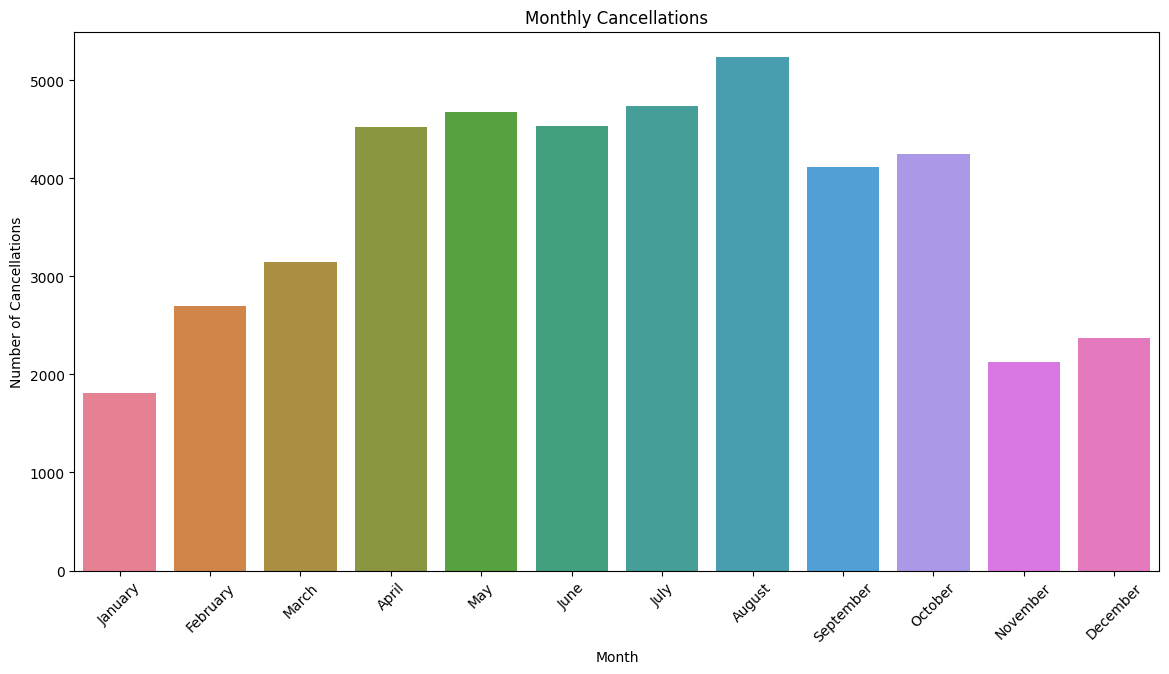

In [ ]:
# visualize cancellations by month
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, hue=monthly_cancellations.index, legend=False)
plt.title('Monthly Cancellations')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# monthly bookings
monthly_bookings = df['arrival_date_month'].value_counts().reindex(month_order)


<Figure size 1400x700 with 0 Axes>

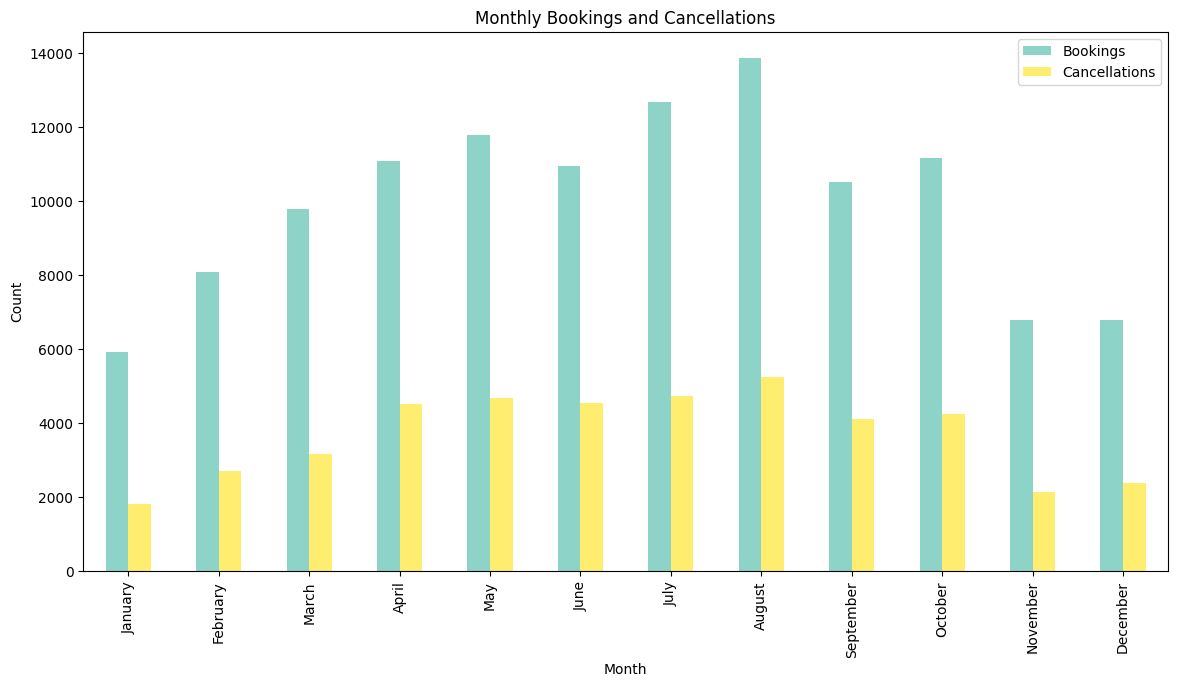

In [ ]:
# visualization of monthly bookings to monthly cancellations
plt.figure(figsize=(14, 7))
monthly_data = pd.DataFrame({
    'Bookings': monthly_bookings,
    'Cancellations': monthly_cancellations
})

monthly_data.index = pd.CategoricalIndex(monthly_data.index, categories=month_order, ordered=True)
monthly_data = monthly_data.sort_index()




monthly_data.plot(kind='bar', figsize=(14, 7), colormap='Set3')
plt.title('Monthly Bookings and Cancellations')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

The month of August seems to have the highest number of bookings, but also the highest number of cancellations.

**Average Length of Stays**

In [ ]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
average_stay = df.groupby('is_canceled')['total_stay'].mean()
print(average_stay)

is_canceled
0    3.393023
1    3.487223
Name: total_stay, dtype: float64


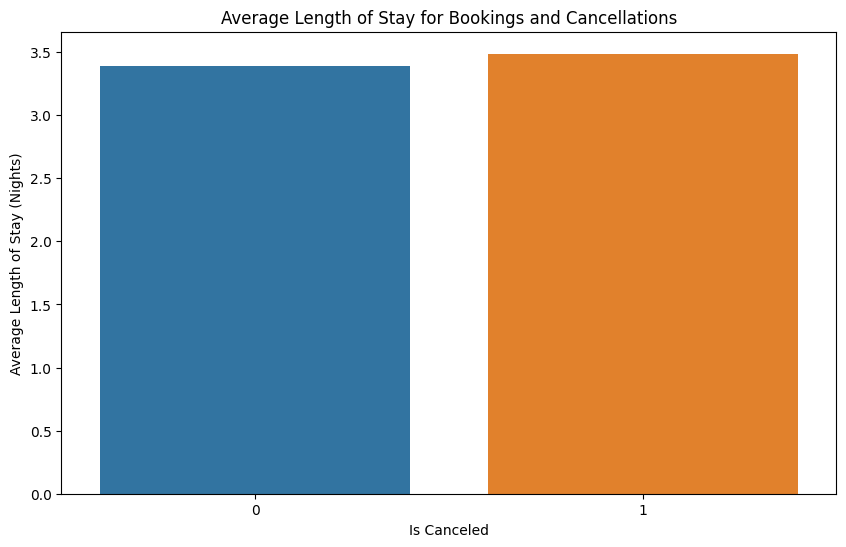

In [ ]:
# visualize average length of stays
plt.figure(figsize=(10, 6))
sns.barplot(x=average_stay.index, y=average_stay.values, hue=average_stay.index, legend=False)
plt.title('Average Length of Stay for Bookings and Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Average Length of Stay (Nights)')
plt.show()

Bookings that were cancelled on average stayed a bit longer than those who did not cancel. Overall, not a huge difference in average stay length.

**Average Daily Rate (ADR) distribution by cancellation status**


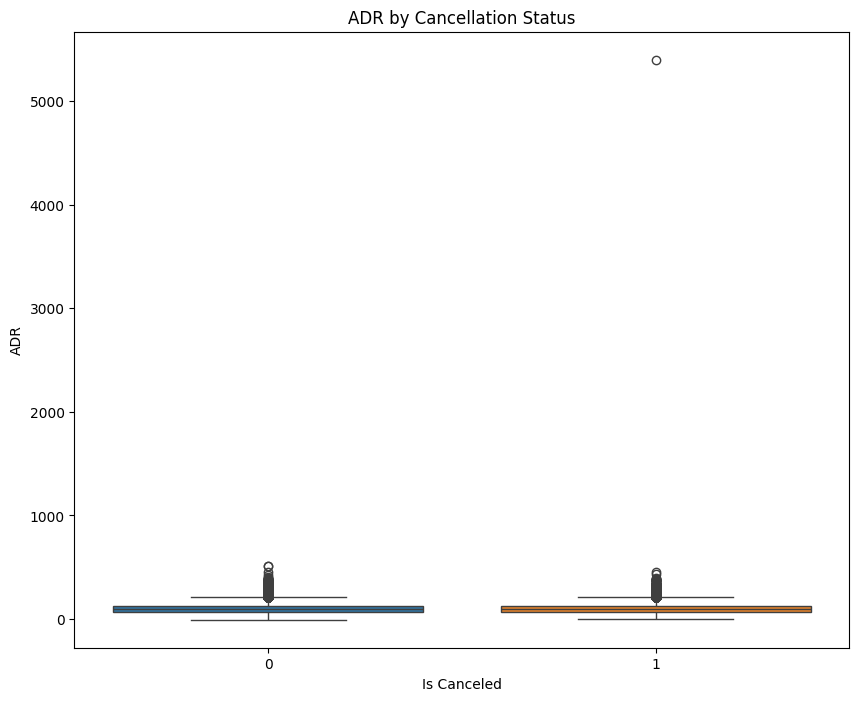

In [ ]:
# visualization
plt.figure(figsize=(10, 8))
sns.boxplot(x='is_canceled', y='adr', data=df, hue='is_canceled', legend=False)
plt.title('ADR by Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('ADR')
plt.show()

We have to drop that Outlier (5000+ adr) its destroying the distribution of the cancellations, and is likely a typo

In [ ]:
# Check the top values of ADR to confirm this is a typo, looks like it, I am going to set it to 540, as it appears to just have an additional 0 added - assumption (it could also be 2 extra 0's seems less likely)

adr_sorted = df['adr'].sort_values(ascending=False)
adr_sorted

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
           ...   
81450        0.00
81451        0.00
81452        0.00
0            0.00
14969       -6.38
Name: adr, Length: 119386, dtype: float64

In [ ]:
# Change from 5400 to 540 for that specific entry

df.loc[df['adr'] == 5400, 'adr'] = 540

In [ ]:
# Verify done correct

adr_sorted = df['adr'].sort_values(ascending=False)
adr_sorted

48515     540.00
111403    510.00
15083     508.00
103912    451.50
13142     450.00
           ...  
81450       0.00
81451       0.00
81452       0.00
0           0.00
14969      -6.38
Name: adr, Length: 119386, dtype: float64

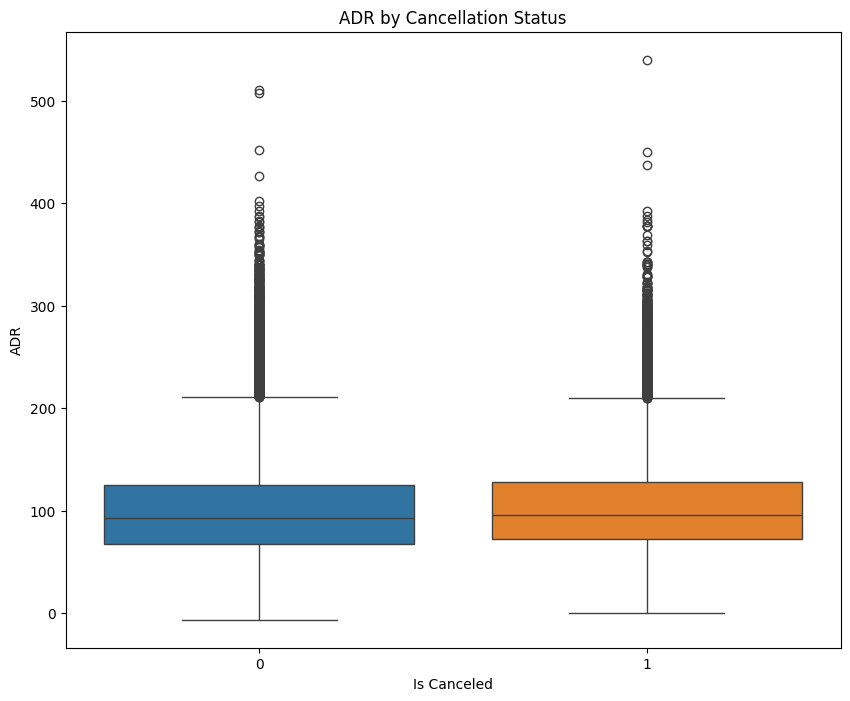

In [ ]:
# Re-Do Visualization after mega outlier corrected

plt.figure(figsize=(10, 8))
sns.boxplot(x='is_canceled', y='adr', data=df, hue='is_canceled', legend=False)
plt.title('ADR by Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('ADR')
plt.show()

**Cancellation by Customer Type**

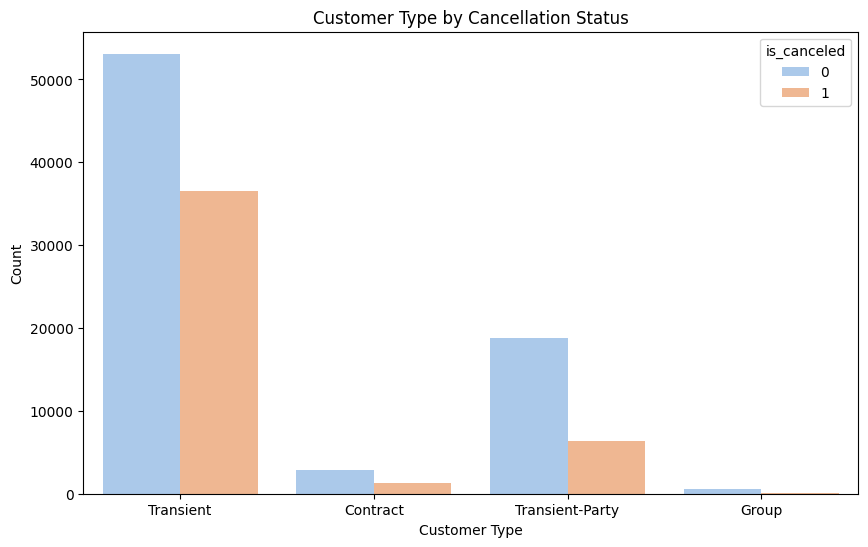

In [ ]:
# customer type distribution by cancellation status
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette='pastel')
plt.title('Customer Type by Cancellation Status')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

Insert insights.

**Cancellation Status by Market Segment**

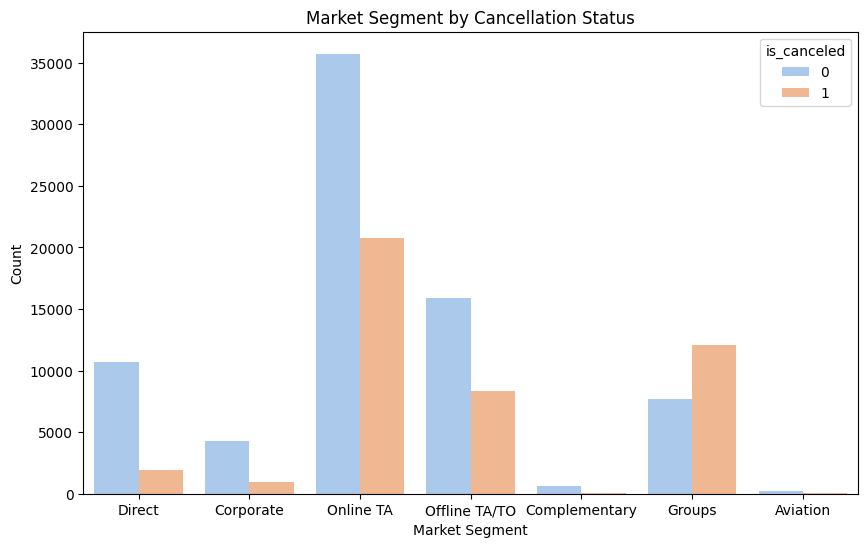

In [ ]:
# market segment distribution by cancellation status
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='pastel')
plt.title('Market Segment by Cancellation Status')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()

The Online Travel Agent segment has the highest cancellation rate, which could signal that bookings made through an online agent might be less reliable. The hotels could potentially look at strengthening their direct booking channels by offering better rates or perks for direct booking so guests choose to book directly instead. Can also work closely with the Online Travel Agencies to understand reasons for higher cancellations.


**Correlation Matrix**

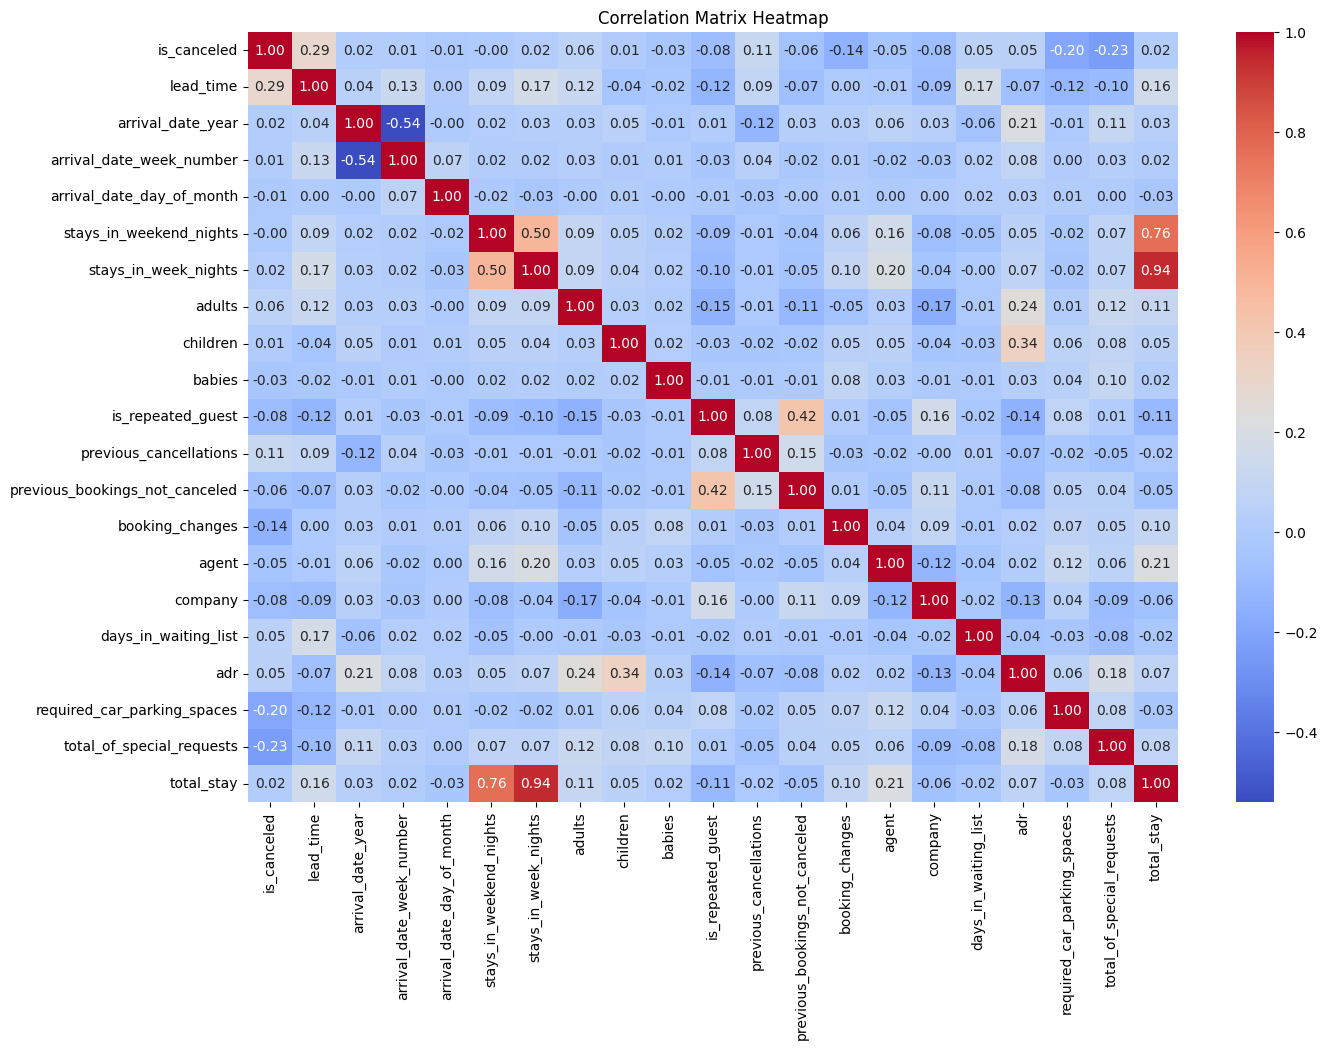

In [ ]:
# heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Correlations with Cancellations**

***lead_time*** - there's some positive correlation (0.29) with cancellations, meaning bookings made well in advance are more likely to be cancelled.

***previous_cancellations*** - a slight positive correlation (0.11) that suggests customers who have cancelled previously are slightly more likely to cancel again.

***total_special_requests*** - moderate negative correlation (-0.23) that suggests bookings with more special requests are less likely to be cancelled.

array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>,
        <Axes: title={'center': 'arrival_date_day_of_month'}>],
       [<Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>],
       [<Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>,
        <Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>],
       [<Axes: title={'center': 'company'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_car

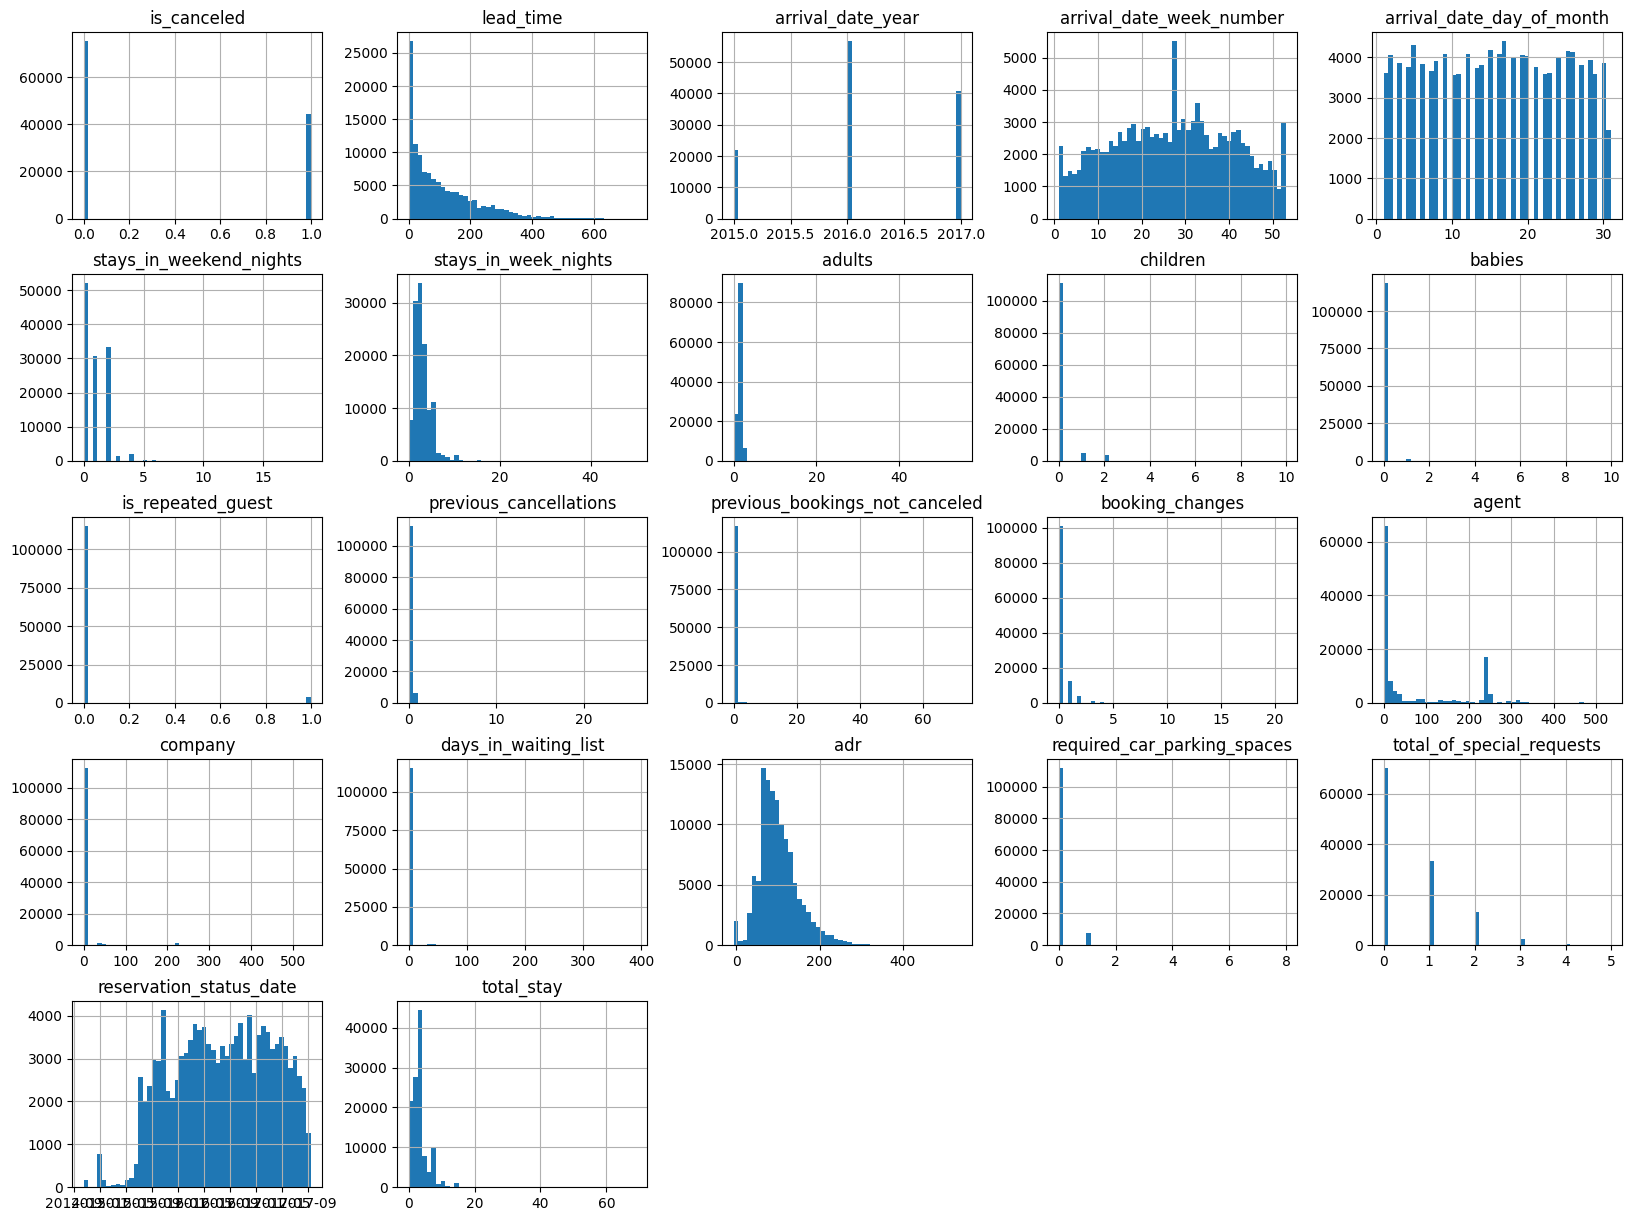

In [ ]:
df.hist(bins=50, figsize=(20,15))

# Feature Engineering

IMPORTANT NOTE ABOUT REVENUE CALCULATION - Because some customers purchased a DAY PASS, which means they did not stay any nights, but they still paid for the day. To account for this when calculating revenue from ADR, we have set total_stay_adjusted to 1 (they pay for the day) when the total_stay = 0. Also, for all cancelled bookings, we still calculate revenue, so we can see how much potential revenue is lost from the cancellation. Might be useful to calculate some potential earnings by reducing cancellations.

In [ ]:
# Calculate total nights stayed
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Adjust total stay to account for same-day check-ins/check-outs
df['total_stay_adjusted'] = df.apply(lambda row: 1 if row['total_stay'] == 0 else row['total_stay'], axis=1)

# Calculate total revenue for each booking
df['total_revenue'] = df['adr'] * df['total_stay_adjusted']

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_stay_adjusted,total_revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,196.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,196.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,2,214.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,2,2,206.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,3,3,246.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.5,0,0,Canceled,2015-04-22,3,3,316.5


In [ ]:
# Check for ADR values of zero
adr_zero_count = df[df['adr'] == 0].shape[0]

print(f"Number of bookings with ADR of 0: {adr_zero_count}")

Number of bookings with ADR of 0: 1959


In [ ]:
# ADR cannot be 0, this must be an error, since it is a reasonably small number of values, we will drop these entries before modelling
# Considered imputing them, but ADR has a large range and spread, it would likely not be accurate

df = df[df['adr'] != 0]

# Calculate the average revenue lost per cancellation
If we reduce cancellations by 10% then we will make the company 20% of this value (revenue is no longer lost, and instead gained) x 2

In [ ]:
# Filter the DataFrame for rows where is_cancelled == 1
cancelled_df = df[df['is_canceled'] == 1]

# Calculate the average revenue for the filtered rows
average_revenue_cancelled = cancelled_df['total_revenue'].mean()

print("Average revenue where is_canceled == 1:", average_revenue_cancelled)

Average revenue where is_canceled == 1: 379.97976730974614


# Did not end up using this Feature, used specific companies instead, it proved to be performing well, so chose not to retest using this feature.

In [ ]:
# I want to create a new column business_personal for a binary response to either a company booked the trip (1) or not (0)
# This way we retain the unique company ID's for testing in the company column and can use this instead if performance is poor

df['business_personal'] = df['company'].apply(lambda x: 1 if x != 0 else 0)
df['business_personal'].head(20)

2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
Name: business_personal, dtype: int64

# Logistic Regression Model - To Predict Cancelled or Not (Binary)
Will also give us coefficients to see what is driving cancellations. (REMEMBER: doesn't imply causation)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_stay_adjusted', 'total_revenue', 'business_personal'],
      dtype='object')

In [ ]:
# Lets Make a Complete Logression Model predicting binary (0=not_canceled, 1=canceled)
# Take as many inputs as possible
# Print the coefficients so we can see what variables are driving the cancellations
# Excluded 'reservation_status_date' because it is a DateTime, would result in 1 million categoricals after OHE
# Excluded 'reservation_status' because it is the output essentially (reservation_status
# Check-Out    75166
# Canceled     43013
# No-Show       1207)


X = df[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'business_personal', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'total_revenue']]
y = df['is_canceled']

numeric_columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations',
                   'previous_bookings_not_canceled','booking_changes','business_personal','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests',
                   'total_stay','total_revenue']
categorical_columns = ['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','meal','country','market_segment',
                       'distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','customer_type']

In [ ]:
# Start Building Pipeline with PreProcessor

# Define the transformer for numeric columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define the transformer for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'business_personal',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parki...
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel', 'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'meal', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type', 'agent',
                                                   'customer_type'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

# Use these coefficients to discuss the early indicators of cancellations

In [ ]:
# Retrieve the logistic regression model from the pipeline
logreg_model = pipeline.named_steps['classifier']

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Get the feature names after OHE and scaling
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the coefficients
print(coefficients_df.sort_values(by='Coefficient', ascending=False))

                                 Feature  Coefficient
6            num__previous_cancellations    12.079222
0                         num__lead_time     3.600698
310                        cat__agent_17     2.897877
291         cat__deposit_type_Non Refund     2.753169
434                       cat__agent_191     2.252276
455                       cat__agent_240     2.185114
2              num__stays_in_week_nights     2.141299
481                       cat__agent_281     2.029534
280            cat__assigned_room_type_A     1.999009
351                        cat__agent_67     1.983998
352                        cat__agent_68     1.933684
302                         cat__agent_9     1.926199
187                     cat__country_MAC     1.883381
95                      cat__country_ARE     1.871310
14                       num__total_stay     1.841333
277            cat__reserved_room_type_G     1.802926
596                       cat__agent_531     1.800860
216                     cat_

The bigger the number (both positive or negative) the more influence it has, this is quite interesting, the positive one makes sense (previous number of cancels) but the bottom coeff is NUMBER OF PARKING SPACES REQ which is very interesting.


In [ ]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     22054
           1       0.81      0.71      0.75     13175

    accuracy                           0.83     35229
   macro avg       0.82      0.80      0.81     35229
weighted avg       0.83      0.83      0.82     35229



# Revenue Prediction Model - Random Forest then try Logistic Regression for Coefficients
Predict Customer Value (1 to 5) based on booking characteristics
Requires creating a new feature 'revenue_class' which assigns a value between 1 and 5 based on revenue quantiles

In [ ]:
# Define revenue classes based on total revenue quantiles
df['revenue_class'] = pd.qcut(df['total_revenue'], q=5, labels=[1, 2, 3, 4, 5])

# Define features and target variable
features = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
            'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
            'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type',
            'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company',
            'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
            'total_of_special_requests']

X = df[features]
y = df['revenue_class']

# Define numerical and categorical columns
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                     'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'days_in_waiting_list',
                     'required_car_parking_spaces', 'total_of_special_requests']

categorical_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                       'meal', 'country', 'market_segment', 'distribution_channel',
                       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'agent', 'company', 'customer_type']

# Cross Validation of Random Forest, KNN, Logistic Regression and SVM (removed - too computationally intensive)
(this takes hours to run - do not re-run)

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Perform cross-validation for each model
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    results[model_name] = cv_scores
    print(f"{model_name} Mean CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")

# Print summary of results
print("\nSummary of Cross-Validation Results:")
for model_name, cv_scores in results.items():
    print(f"{model_name}: Mean CV Accuracy = {cv_scores.mean():.4f}, Std Dev = {cv_scores.std():.4f}")

Logistic Regression Mean CV Accuracy: 0.4785 +/- 0.0324
Random Forest Mean CV Accuracy: 0.4971 +/- 0.0600
K-Nearest Neighbors Mean CV Accuracy: 0.3344 +/- 0.0355

Summary of Cross-Validation Results:
Logistic Regression: Mean CV Accuracy = 0.4785, Std Dev = 0.0324
Random Forest: Mean CV Accuracy = 0.4971, Std Dev = 0.0600
K-Nearest Neighbors: Mean CV Accuracy = 0.3344, Std Dev = 0.0355


# Random Forest Model Chosen

              precision    recall  f1-score   support

           1       0.86      0.92      0.89      7079
           2       0.82      0.77      0.79      7209
           3       0.79      0.73      0.76      6979
           4       0.75      0.76      0.75      6897
           5       0.85      0.89      0.87      7065

    accuracy                           0.82     35229
   macro avg       0.81      0.82      0.81     35229
weighted avg       0.81      0.82      0.81     35229



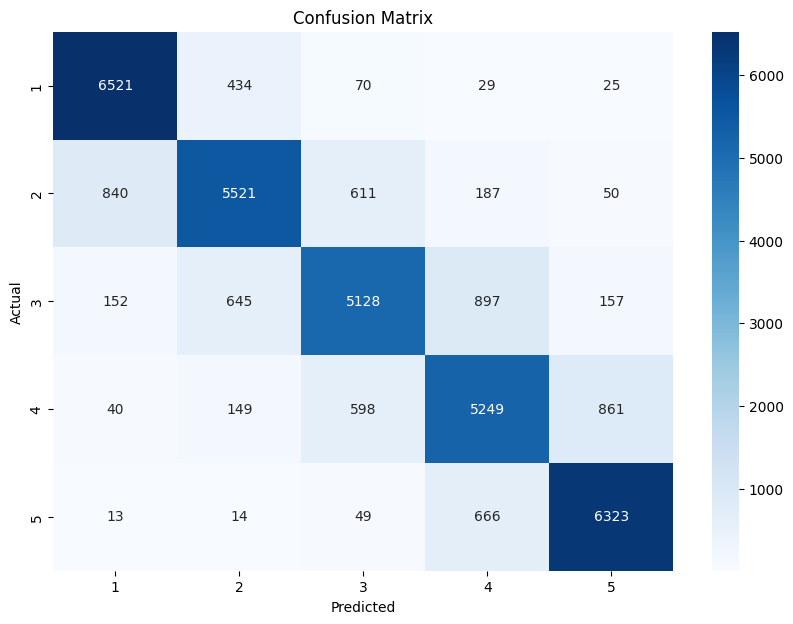

In [ ]:
# Define the preprocessor with OneHotEncoder for categorical features and MinMaxScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with the preprocessor and a RandomForestClassifier
pipeline_rforest_rev = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline_rforest_rev.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_rforest_rev.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Logistic Regression is Struggling with 5 Class Classifier (expected)
Coefficients may still be useful to examine, but it seems to be even less accurate at our target values (4,5)

              precision    recall  f1-score   support

           1       0.72      0.84      0.78      7079
           2       0.57      0.49      0.52      7209
           3       0.56      0.42      0.48      6979
           4       0.49      0.51      0.50      6897
           5       0.73      0.88      0.80      7065

    accuracy                           0.63     35229
   macro avg       0.61      0.63      0.62     35229
weighted avg       0.61      0.63      0.62     35229



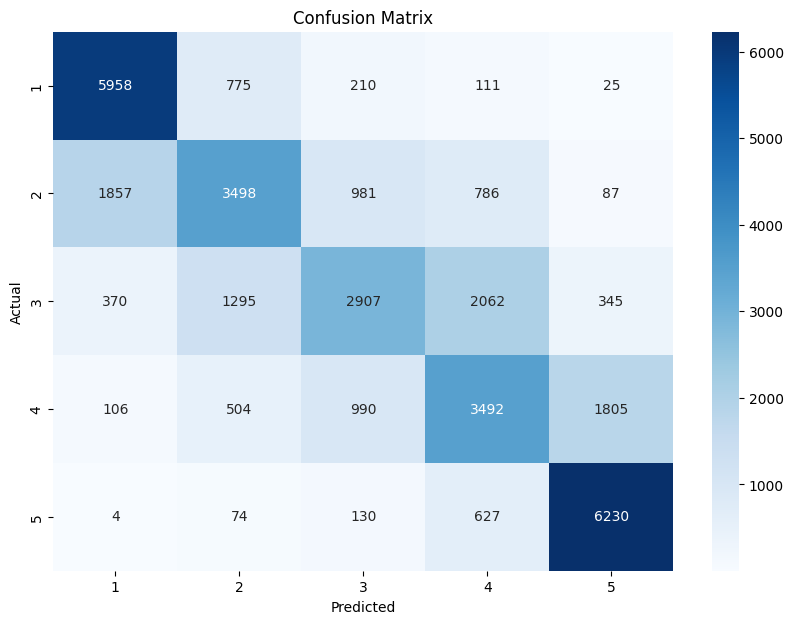

   num__lead_time  num__stays_in_weekend_nights  num__stays_in_week_nights  \
0        1.172762                    -29.804970                 -64.141407   
1       -0.739817                     -9.293523                 -23.947617   
2        0.607633                     -1.455235                  -5.200418   
3       -0.045015                      1.368384                   4.887144   
4       -3.173322                     24.244338                  50.771304   

   num__adults  num__children  num__babies  num__previous_cancellations  \
0    -2.458327      -3.351128     0.347354                     4.281969   
1    -0.120960      -0.470877    -0.799065                    -1.199729   
2     0.579691      -0.812073     0.837784                     0.104810   
3     0.992439      -0.046184     0.123772                    -1.550742   
4     2.758284       4.186746     0.298322                    -1.629378   

   num__previous_bookings_not_canceled  num__booking_changes  \
0               

In [ ]:
# Create a pipeline with the preprocessor and Logistic Regression
pipeline_logreg_rev = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

# Train the model
pipeline_logreg_rev.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_logreg_rev.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Retrieve the logistic regression model from the pipeline
logreg_model = pipeline_logreg_rev.named_steps['classifier']

# Get the coefficients
coefficients = logreg_model.coef_

# Get the feature names after OHE and scaling
feature_names = pipeline_logreg_rev.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the coefficients
print(coefficients_df)

# We will try Hypertuning with GridSearch to improve LogReg for better coefs

In [ ]:
# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Create a pipeline with the preprocessor and Logistic Regression
pipeline_logreg_rev = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

# Set up the GridSearchCV
grid_search = GridSearchCV(pipeline_logreg_rev, param_grid, cv=5, scoring='accuracy')

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters found:  {'classifier__C': 100, 'classifier__solver': 'lbfgs'}
Best cross-validation accuracy: 0.66
              precision    recall  f1-score   support

           1       0.80      0.90      0.85      7079
           2       0.61      0.54      0.57      7209
           3       0.57      0.44      0.50      6979
           4       0.50      0.53      0.52      6897
           5       0.76      0.88      0.82      7065

    accuracy                           0.66     35229
   macro avg       0.65      0.66      0.65     35229
weighted avg       0.65      0.66      0.65     35229

[[6354  530  108   61   26]
 [1442 3893 1036  783   55]
 [ 116 1362 3103 2142  256]
 [  19  533 1057 3648 1640]
 [   1   93  126  595 6250]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.80      0.90      0.85      7079
           2       0.61      0.54      0.57      7209
           3       0.57      0.44      0.50      6979
           4       0.50      0.53      0.52      6897
           5       0.76      0.88      0.82      7065

    accuracy                           0.66     35229
   macro avg       0.65      0.66      0.65     35229
weighted avg       0.65      0.66      0.65     35229



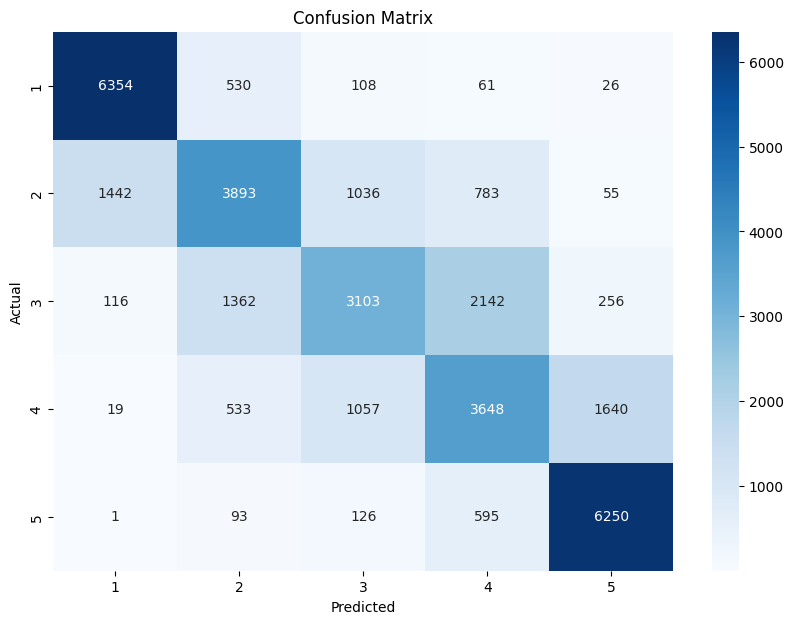

In [ ]:
# Rerun the LogReg with new parameters, Update Pipeline

# Create a pipeline with the preprocessor and Logistic Regression with best parameters
pipeline_logreg_rev = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=100, solver='lbfgs', max_iter=1000, multi_class='ovr'))
])

# Train the model
pipeline_logreg_rev.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_logreg_rev.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Retrieve the logistic regression model from the pipeline
logreg_model = pipeline_logreg_rev.named_steps['classifier']

# Get the coefficients
coefficients = logreg_model.coef_

# Get the feature names after OHE and scaling
feature_names = pipeline_logreg_rev.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the coefficients
print(coefficients_df)

   num__lead_time  num__stays_in_weekend_nights  num__stays_in_week_nights  \
0        3.380090                    -65.225280                -172.607676   
1       -0.603876                    -10.407546                 -30.435747   
2        0.650933                     -1.507364                  -6.020445   
3       -0.071968                      1.252632                   5.375102   
4       -5.349638                     32.094728                  82.258138   

   num__adults  num__children  num__babies  num__previous_cancellations  \
0    -3.127549      -5.738234     0.601551                     8.680749   
1    -0.080486      -0.419202    -2.021144                    -1.712859   
2     0.578409      -0.932928     1.672137                    -0.255757   
3     1.017139      -0.042824     0.161250                    -2.142396   
4     3.931696       6.257997     1.058389                    -1.728397   

   num__previous_bookings_not_canceled  num__booking_changes  \
0               

# Coefficients Summarized Max/Min

In [ ]:
# Retrieve the logistic regression model from the pipeline
logreg_model = pipeline_logreg_rev.named_steps['classifier']

# Get the coefficients
coefficients = logreg_model.coef_

# Get the feature names after OHE and scaling
feature_names = pipeline_logreg_rev.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)

# Summarize the highest and lowest coefficients
num_top_features = 20  # Number of top features to display
coefficients_summary = coefficients_df.T
coefficients_summary.columns = [f'Class {i+1}' for i in range(coefficients_summary.shape[1])]
coefficients_summary['Max Coefficient'] = coefficients_summary.max(axis=1)
coefficients_summary['Min Coefficient'] = coefficients_summary.min(axis=1)

# Sort and select the top features for max and min coefficients
top_max_coefficients = coefficients_summary.sort_values(by='Max Coefficient', ascending=False).head(num_top_features)
top_min_coefficients = coefficients_summary.sort_values(by='Min Coefficient').head(num_top_features)

# Display the summarized coefficients
print("Top Highest Coefficients:")
print(top_max_coefficients[['Max Coefficient']])

print("\nTop Lowest Coefficients:")
print(top_min_coefficients[['Min Coefficient']])

Top Highest Coefficients:
                              Max Coefficient
num__stays_in_week_nights           82.258138
num__stays_in_weekend_nights        32.094728
cat__agent_420                      16.808593
cat__agent_273                      13.080499
cat__agent_313                      11.827499
cat__company_202                     9.653220
cat__agent_82                        9.284487
cat__company_361                     8.949075
cat__company_369                     8.767034
cat__company_122                     8.724342
cat__agent_275                       8.724169
num__previous_cancellations          8.680749
cat__company_378                     8.462850
cat__company_385                     8.393900
cat__agent_502                       8.124732
cat__agent_107                       8.078355
cat__company_77                      8.033487
cat__company_271                     7.987267
cat__company_48                      7.968930
cat__agent_235                       7.959870

Top Low

Number of Nights Stayed, obviously big indicator for revenue on both ends. But here we can talk about the specific agents and companies at the bottom of the list and top of the list (the good agents/companies vs bad agents/companies)